# Lab Session 4: Plotting with Matplotlib
[Effrosyni Simou](http://lts4.epfl.ch/simou), *PhD Student*, [EPFL](http://epfl.ch) [LTS4](http://lts4.epfl.ch)

## Ojective
In this lab session we will provide a short tutorial to ``Matplotlib``. We will present:

1) The ``matplotlib.pyplot`` module that provides a procedural interface similar to those of Matlab and Mathematica

2) The Object Oriented API of Matplotlib, which allows for the maximum control 

## Resources

Here are some links that you may find useful if you want to learn more about ``Matplotlib``, than what is included in this demo:

* [Matplotlib Documentation](https://matplotlib.org/index.html)
* [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)

## 1. The Pyplot API

In [15]:
import numpy as np
import scipy.sparse as ss

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1.1: Plot a linear function

Plot $y=x+1$, add labels to the axes and give your plot a title.

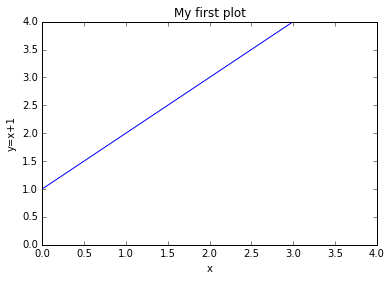

In [17]:
plt.plot([1,2,3,4])
plt.xlabel('x')
plt.ylabel('y=x+1')
plt.axis([0, 4, 0, 4]);
plt.title('My first plot');

### Example 1.2: Plot the sparsity pattern on a 2-D array.

Create and plot an adjacency matrix for a graph with 10 nodes.

In [18]:
row_ind=np.array([1, 3, 9, 7, 6, 9 ,2, 5, 8, 3, 7, 8])
col_ind=np.array([2, 5, 8, 3, 7, 8, 1, 3, 9, 7, 6, 9])
data=np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
W=ss.csr_matrix((data,(row_ind, col_ind)),shape=(10, 10)).toarray()
#np.nonzero(W-W.transpose())

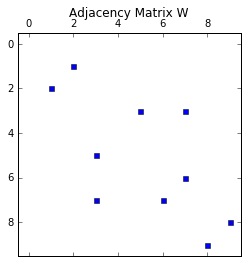

In [19]:
plt.spy(W,markersize=5);
plt.title('Adjacency Matrix W');

### Example 1.3: Plot a histogram

Find the degree of the nodes of the graph that you created in Example 1.2 and plot the degree histogram.

In [20]:
d = W.sum(axis=0)

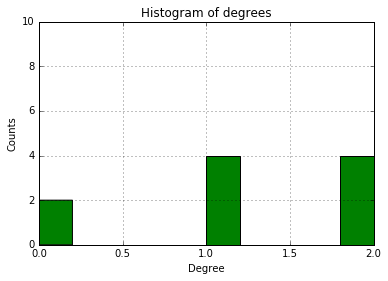

In [21]:
n, bins, patches =plt.hist(d, 10, facecolor='g');
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Histogram of degrees')
plt.axis([0, 2, 0, 10])
plt.grid(True)

### What else can you plot with Pyplot?
You can find a full list of all the functions provided by ``Pyplot`` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html)

So far we have created simple plots, like the ones you had to create for your first two assignments, using the ``Pyplot`` API. ``Pyplot`` provides a procedural interface similar to the one that you might have been used to from Matlab. However, an important drawback of ``Pyplot`` is that it does not keep the figure instance open. 

In order to understand this, you can type ``plt.plot(#whatever you want to plot)`` in a cell and execute it and then, in the following cell, type ``plt.title('My plot')``. When you execute the second cell an empty figure with a title "My plot" will be created, but no title will have been added to your original plot.

So, what should you do if you want to create a more sophisticated plot where you might want to go back to later in your program and add/edit some of its elements? You can do that by using the Object Oriented API of ``Matplotlib``.

## 2. The Object Oriented API

Let's have a closer look at what happened when we called the ``pyplot.plot()`` before. Actually, two things happened in the background:

1) We created a figure instance describing the plot window and all of its properties.

2) We added an axes element within the figure. The axes element allows for the data to be arranged in x and y coordinates and provides a wide range of functions. Find out more about the axes class [here](https://matplotlib.org/api/axes_api.html).

### Example 2.1: Using the agg backend.

In order to fully understand this example you should first have a look at [this tutorial](https://matplotlib.org/users/artists.html) in order to understand the underlying concepts of ``Artist``, ``FigureCanvas`` and ``Renderer``.

In [22]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
# create a Figure instance
fig = Figure()   
# Instanciate the FigureCanvas with the figure as argument
FigureCanvas(fig)
#print(type(fig.canvas))
ax = fig.add_subplot(111)
ax.plot([1, 2, 3],[1, 2, 3])
ax.set_title('My first title')
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('y=x')
fig.savefig('test')

Open the file test.png to see the plot that you created.

Now, change the title in your created plot as follows:

In [23]:
ax.set_title('I changed the title')
fig.savefig('test')

Open again the file test.png. You will see that the title has been changed. 

### Example 2.2: Use Pyplot only to create the figure and show calls

In [25]:
%matplotlib notebook 
#activate the nbagg backend, which enables interactivity within the Jupyter Notebook

A commonly used practice for production quality scripts is to use the ``matplotlib.pyplot`` just to create the figure and show calls, and use the OO API for everything else. There are two ways to do that:

#### A: Create an interactive figure using pyplot and create an axes instance on the figure

<IPython.core.display.Javascript object>


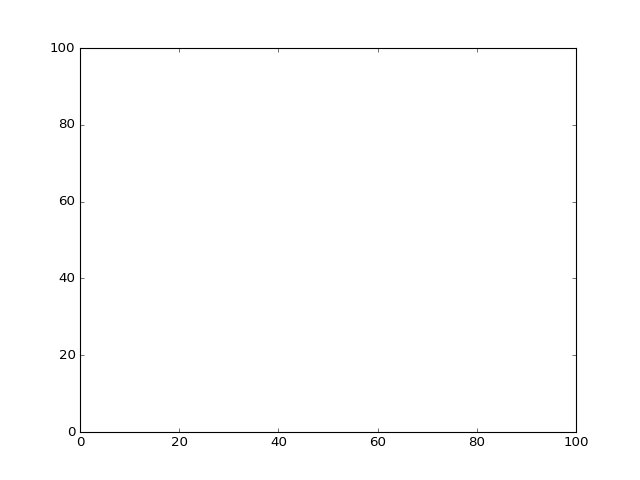

In [26]:
fig1 = plt.figure()
# Get the current :class:`~matplotlib.axes.Axes` instance on the current figure
ax1=fig1.gca()
#type(fig1.canvas)

#### B: Create an interactive figure using pyplot and add a subplot instance on the figure

<IPython.core.display.Javascript object>


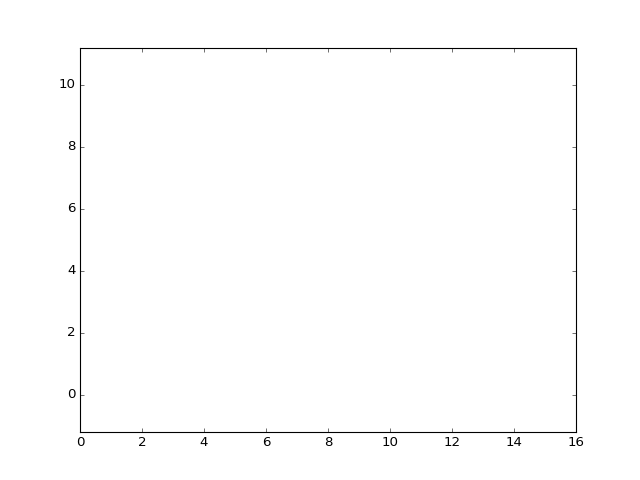

In [27]:
fig2 = plt.figure()
ax2=fig2.add_subplot(111)
#type(fig2.canvas)

Now that you have created your figures you can plot on them using the ``Axes`` class. Here, as an example, we will plot a scatter plot in ``fig1`` and a cool optical illusion created by [Jake VanderPlas](https://staff.washington.edu/jakevdp/) (the author of the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook )) in ``fig2``. If you are interested you can find more optical illusions created with ``Matplotlib`` by Jake VanderPlas [here](http://nbviewer.jupyter.org/gist/jakevdp/514bcc09637ac71ca1a8fa703c54e5f7#Crazy-Squares).

In [28]:
a = np.random.randint(1, 100, size=10)
b = np.random.randint(1, 100, size=10)
ax1.scatter(a, b, color ='red', edgecolors='black')
ax1.set_xscale("linear")
ax1.set_yscale("linear") #change to "log" and see what happens
ax1.set_xlim(0, 100)
ax1.set_ylim(0, 100)
ax1.set_title('My first scatterplot')
plt.show(fig1)

In [29]:
from matplotlib.collections import PatchCollection

squares = [plt.Rectangle((i + 0.2 * (j % 3), j), 1, 1)
           for j in range(10) for i in range(0, 15, 2)]

ax2.add_collection(PatchCollection(squares, color='black'))

ax2.hlines(np.arange(11), 0, 16, color='gray')

ax2.axis('equal')
ax2.axis('off');

With ``axes.clear()`` you will clear the content of the figures ``fig1`` and ``fig2``.

In [30]:
ax1.clear();
ax2.clear();

Now, you can spend sometime to create you own plots with ``Matplotlib``. Have fun!

In [ ]:
#your code here